<a href="https://colab.research.google.com/github/patrejos/MNIST/blob/main/ModeloPredictivoYGenerativoMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modelo Predictivo MNIST

El objetivo de este proyecto es resolver uno de los problemas clásicos e iniciales para el machine learnig especificamente el área de visión computacional con la clasificación de digitos de la base de datos MNIST.

### Que modelo se va a usar

Se utilizara el modelo Naive Bayes, que es un algoritmo de clasificación que se basa en el teorema de Bayes, incluye el termino naive (ingenuo), pues esta centrado en que todas las características son independientes entre sí, que puede ser una suposicion fuerte.

### Teorema de Bayes en el Contexto de Naive Bayes

El Teorema de Bayes establece la relación entre la probabilidad condicional de dos eventos, y se expresa de la siguiente manera:

$$ P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} $$

Donde:
- \( P(A|B) \) es la probabilidad condicional de A dado B.
- \( P(B|A) \) es la probabilidad condicional de B dado A.
- \( P(A) \) y \( P(B) \) son las probabilidades marginales de A y B, respectivamente.

En el contexto del algoritmo de Naive Bayes, asumimos la independencia entre las características dadas las clases. Supongamos que tenemos un conjunto de características $$X = \{x_1, x_2, \ldots, x_n\}$$ y una clase \(C\). Podemos usar el teorema de Bayes para calcular la probabilidad de que una instancia pertenezca a la clase \(C\) dado el conjunto de características \(X\):

$$ P(C|X) = \frac{P(X|C) \cdot P(C)}{P(X)} $$

En este contexto:
- \( P(C|X) \) es la probabilidad de que la instancia pertenezca a la clase \(C\) dado el conjunto de características \(X\).
- \( P(X|C) \) es la probabilidad de observar el conjunto de características \(X\) dada la clase \(C\).
- \( P(C) \) es la probabilidad prior de la clase \(C\).
- \( P(X) \) es la probabilidad marginal de observar el conjunto de características \(X\).

El enfoque "naive" asume independencia entre las características, lo que simplifica la expresión de \( P(X|C) \) a:

$$P(X|C) = P(x_1|C) \cdot P(x_2|C) \cdot \ldots \cdot P(x_n|C) $$

Esto permite calcular fácilmente \( P(C|X) \), y la clase con la probabilidad condicional más alta se predice como la clase final para la instancia dada. Este enfoque es efectivo y eficiente, especialmente en tareas de clasificación de texto y minería de datos.


### Cargamos los datos y librerias necesarias

Tomamos x_train como los datos para entrenar el modelo y y_train como las etiquetas que traen, y en x_test se guardan las imagenes para probar el rendimiento del modelo, para cargar de manera efectiva el modelo, normalizamos los valores dividiendo por 255, además se deben converitr en vectores de una dimension.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt


mnist = fetch_openml('mnist_784', version=1, cache=True)


X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Se usara de la libreria sklearn la función GuaussianNB que se refiere a un modelo de clasificacion gaussiano pues al tomar pixeles de imagenes se pueden tomar como continuas y que siguen una distribucion normal




In [25]:
gaussian_naive_bayes_model = GaussianNB()


gaussian_naive_bayes_model.fit(X_train, y_train)


y_pred = gaussian_naive_bayes_model.predict(X_test)


accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5515714285714286


Sin embargo al considerar que son imagenes sencillas que estan a dos colores, se puede pensar en binarizar las imagenes sin que se pierda mucha información y con esto poder utilizar un metodo naive bayes para la distribucion bernoulli, pues estan binarizadas.


### Ejemplo de la binarizacion

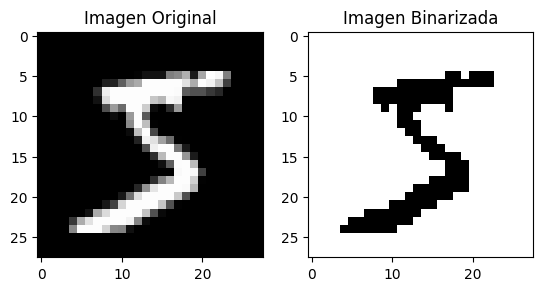

In [26]:
imagen_original = mnist.data.iloc[0].to_numpy().reshape(28, 28)
umbral = 128

imagen_binarizada = np.where(imagen_original > umbral, 1, 0)

# Visualizar la imagen original y la binarizada
plt.subplot(1, 2, 1)
plt.imshow(imagen_original, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(imagen_binarizada, cmap='binary')
plt.title('Imagen Binarizada')

plt.show()


Generalizamos la binarizacion del ejemplo anterior y se lo aplicamos a todas las imagenes de nuestro conjunto de datos, se escoge como umbral 128, pues los pixeles manejan valores de 0-255, por lo que al tomar 128 como

In [27]:
imagenes_binarizadas = mnist.data.applymap(lambda x: 1 if x > umbral else 0)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(imagenes_binarizadas, mnist.target, test_size=0.2, random_state=42)

# Inicializar el clasificador Naive Bayes Bernoulli
bernoulli_model = BernoulliNB()

# Entrenar el modelo con los datos de entrenamiento
bernoulli_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = bernoulli_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8385714285714285


Podemos notar una mejoria en el accuracy del modelo utilizando la version de Bernoulli

# Generador de imagenes

 El uso de un Variational Autoencoder (VAE) para generar imágenes MNIST se justifica por su capacidad para representar de manera continua, regularizar, generar nuevos datos, permitir interpolaciones suaves y ofrecer información probabilística valiosa. Estas características hacen que el VAE sea una elección poderosa y efectiva para abordar los desafíos particulares presentes en el conjunto de datos MNIST.






In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras import metrics
from tensorflow.keras.datasets import mnist

# Cargar datos MNIST
(x_train, _), (x_test, y_test) = mnist.load_data()

# Normalizar y aplanar las imágenes
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Definir la arquitectura del Variational Autoencoder (VAE)
original_dim = 784
intermediate_dim = 256
latent_dim = 2

# Encoder
x = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

# Función de muestreo
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# Construir el modelo completo
vae = Model(x, x_decoded_mean)

# Construir un modelo que toma una entrada y da las medias y los log variances
encoder = Model(x, [z_mean, z_log_var])

# Construir el modelo del generador
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

# Pérdida VAE
xent_loss = original_dim * metrics.binary_crossentropy(x, x_decoded_mean)
kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)

vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')
vae.summary()
# Entrenar el VAE
vae.fit(x_train, shuffle=True, epochs=50, batch_size=32, validation_data=(x_test, None))

# Generar y visualizar una imagen simulada
def generar_imagen_para_numero(numero_deseado):
    noise = np.random.normal(0, 1, (1, latent_dim))
    gen_img = generator.predict(noise)
    gen_img = gen_img.reshape(28, 28)
    plt.imshow(gen_img, cmap='gray')
    plt.title(f'Imagen Simulada para el Número {numero_deseado}')
    plt.show()

# Generar y visualizar una imagen simulada para el número 5 (puedes cambiar el número deseado)
generar_imagen_para_numero(5)


1/1 [==============================] - 0s 83ms/step


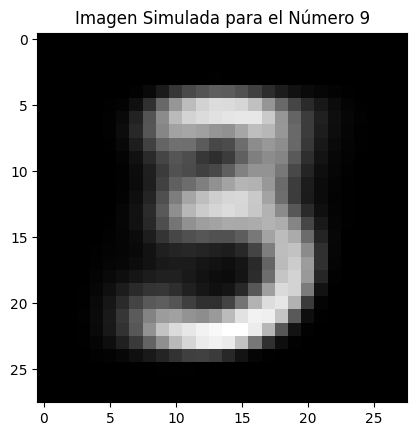

In [49]:
generar_imagen_para_numero(9)

Se puede notar que el modelo no funciona bien, pues se pueden interpretar otros numeros de las imagenes